In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
for device in ('laptop', 'RPi'):
    df = pd.read_json('temp/times_{}.json'.format(device))
    for model in df:
        df[model]['lib import'] = '{:.3f}+-{:.3f}'.format(np.mean(df[model]['lib import']),
                                                          np.std(df[model]['lib import']))
        df[model]['model load'] = '{:.3f}+-{:.3f}'.format(np.mean(df[model]['model load']),
                                                          np.std(df[model]['model load']))
        df[model]['model inference'] = '{:.3f}+-{:.3f}'.format(np.mean(df[model]['model inference']),
                                                               np.std(df[model]['model inference']))
        df[str(model).replace('intent_classifier_', '')] = df[model]
        del df[model]

    print(device)
    display(df)


laptop


,pytorch,keras
lib import,3.329+-0.055,1.805+-0.046
model load,0.001+-0.000,0.001+-0.000
model inference,0.036+-0.014,0.028+-0.001


RPi


,pytorch,keras
lib import,13.785+-0.087,5.862+-0.529
model load,0.004+-0.000,0.004+-0.001
model inference,0.672+-0.226,0.644+-0.081


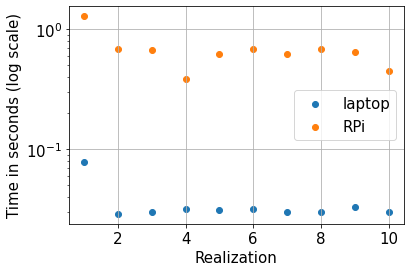

mean: 0.036
mean: 0.031
std: 0.014
std: 0.001
mean: 0.672
mean: 0.604
std: 0.226
std: 0.105


In [3]:
import matplotlib.pyplot as plt
import json

with open('temp/times_laptop.json') as f:
    data_laptop = json.load(f)

with open('temp/times_RPi.json') as f:
    data_RPi = json.load(f)

# scatter of inference time for pytorch on laptop and RPi
plt.rcParams.update({'font.size': 15})
plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], data_laptop['intent_classifier_pytorch']['model inference'])
plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], data_RPi['intent_classifier_pytorch']['model inference'])
plt.ylabel('Time in seconds (log scale)', fontsize=15)
# y label to log scale
plt.yscale('log')
plt.xlabel('Realization', fontsize=15)
plt.grid()
plt.legend(['laptop', 'RPi'])
plt.savefig('pytorch_first_out.pdf', bbox_inches='tight')
plt.show()

print('mean: {:.3f}'.format(np.mean(data_laptop['intent_classifier_pytorch']['model inference'])))
print('mean: {:.3f}'.format(np.mean(data_laptop['intent_classifier_pytorch']['model inference'][1:])))
print('std: {:.3f}'.format(np.std(data_laptop['intent_classifier_pytorch']['model inference'])))
print('std: {:.3f}'.format(np.std(data_laptop['intent_classifier_pytorch']['model inference'][1:])))

print('mean: {:.3f}'.format(np.mean(data_RPi['intent_classifier_pytorch']['model inference'])))
print('mean: {:.3f}'.format(np.mean(data_RPi['intent_classifier_pytorch']['model inference'][1:])))
print('std: {:.3f}'.format(np.std(data_RPi['intent_classifier_pytorch']['model inference'])))
print('std: {:.3f}'.format(np.std(data_RPi['intent_classifier_pytorch']['model inference'][1:])))


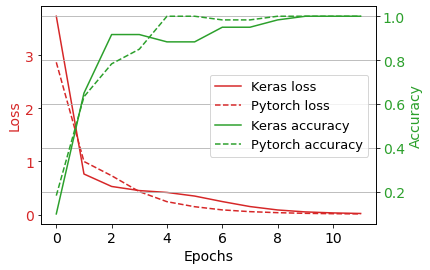

In [6]:
import json
with open("keras_train_process.json", "r", encoding="utf-8") as f:
    keras_data = json.load(f)
with open("pytorch_train_process.json", "r", encoding="utf-8") as f:
    pytorch_data = json.load(f)

# Creating plot with loss
fig, ax1 = plt.subplots()

plt.rcParams.update({'font.size': 14})

color = 'tab:red'
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Loss', color=color, fontsize=14)
ax1.plot(keras_data['loss'][:12], color=color, label='Keras loss')
ax1.plot(pytorch_data['losses'][:12], color=color, linestyle='--', label='Pytorch loss')
ax1.tick_params(axis='y', labelcolor=color)

# Adding Twin Axes to plot using accuracy
ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(keras_data['accuracy'][:12], color=color , label='Keras accuracy')
ax2.plot(pytorch_data['accu'][:12], color=color, linestyle='--', label='Pytorch accuracy')

ax2.tick_params(axis='y', labelcolor=color)

# Add legend
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=14)
# place legend center of plot
fig.legend(loc='center left', bbox_to_anchor=(0.5, 0.5), ncol=1, fontsize=13)
# Adding title
plt.grid()

# Show plot
plt.savefig('keras_pytorch_train.pdf', bbox_inches='tight')
plt.show()



In [5]:
len(keras_data['loss'][:15])

15